In [1]:
import sys
from pathlib import Path

import cv2
import numpy as np

from src.regiongrower import RegionGrower

sys.path.append(str(Path.cwd().parent))

In [2]:
from pathlib import Path

from src.face import FaceDetector
from src.mask import MaskHandler
from src.projectUtils import Utils
from src.superpixels import SuperpixelExtractor, FeatureExtractor
from src.regiongrower import RegionGrower

In [3]:
fd = FaceDetector("../assets/lbfmodel.yaml")
mh = MaskHandler()

IMAGE_PATH = Path('test_images/face.jpg')

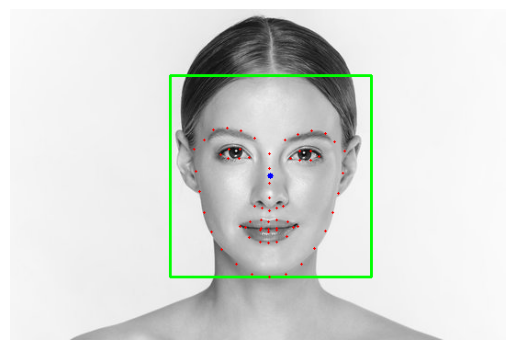

In [4]:
img_rgb, _, _, landmarks_all_faces = fd.detect(IMAGE_PATH)
Utils.display(img_rgb)

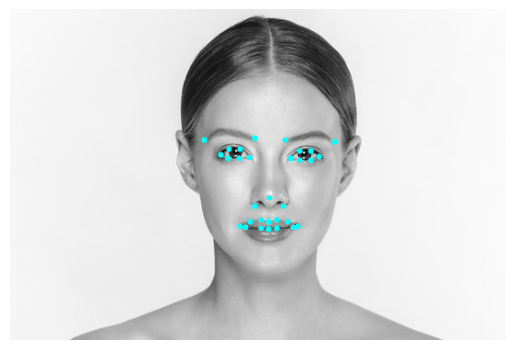

1


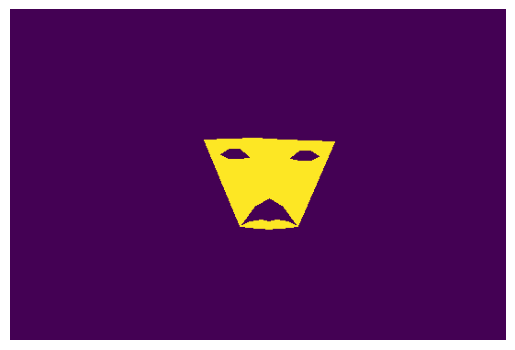

In [84]:
masked_img, selected_pts = mh.get_mask_points(IMAGE_PATH, landmarks_all_faces)
Utils.display(masked_img)

masks, masked_imgs = mh.build_masks(IMAGE_PATH, selected_pts)
print(len(masks))
Utils.display(masks[0])

1


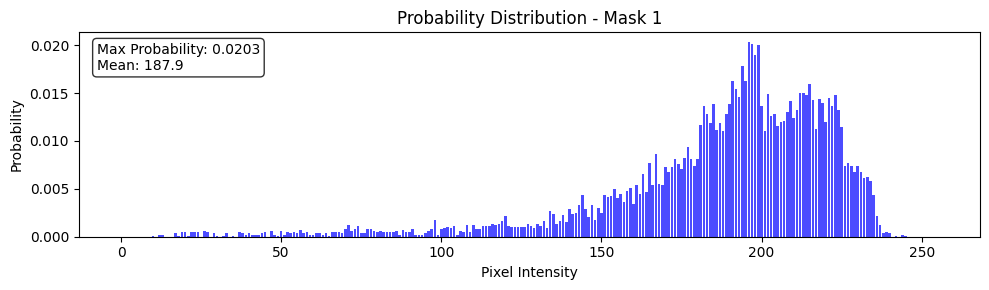

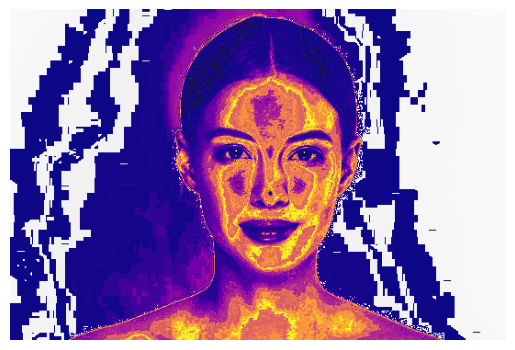

In [85]:
intensity_histograms = mh.get_intensity_histograms(IMAGE_PATH, masks)

print(len(intensity_histograms))
Utils.visualize_histograms(intensity_histograms)
Utils.apply_intensity_probability_map(IMAGE_PATH, intensity_histograms[0])

1
1
1


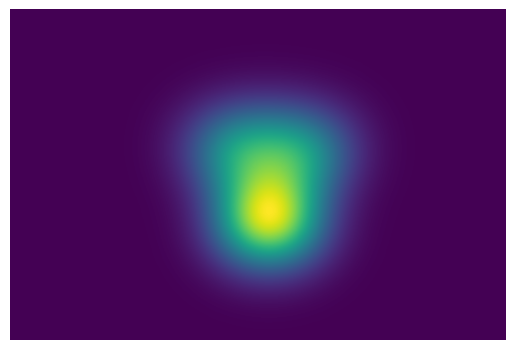

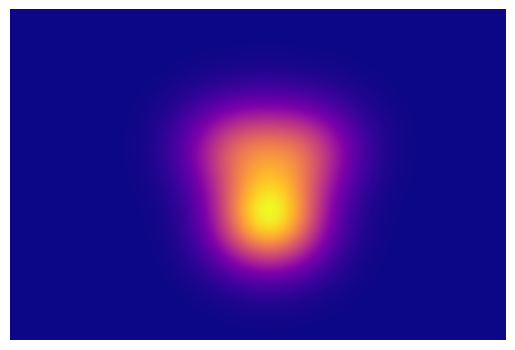

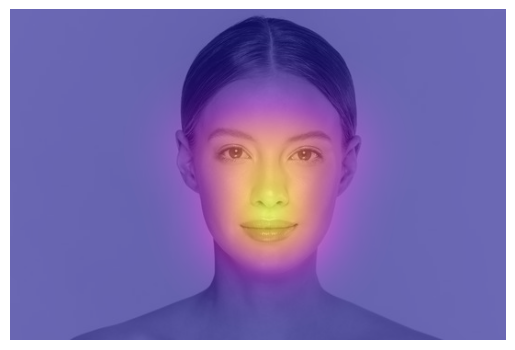

In [86]:
prior_face_masks, heatmaps, heatmaps_blended = mh.get_prior_face_masks(IMAGE_PATH, selected_pts)

print(len(prior_face_masks))
print(len(heatmaps))
print(len(heatmaps_blended))

idx = 0

Utils.display(prior_face_masks[idx])
Utils.display(heatmaps[idx])
Utils.display(heatmaps_blended[idx])

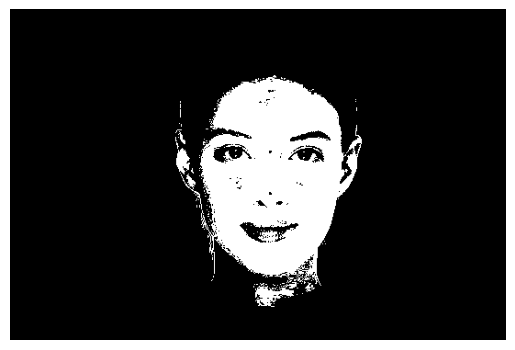

In [87]:
alpha = 0.69
lambda_ = 0.0018

skin_pixel_maps = mh.get_skin_pixel_maps(IMAGE_PATH, intensity_histograms, prior_face_masks, alpha, lambda_)

for i in skin_pixel_maps:
    Utils.display(i, cmap="gray")

In [88]:
spe = SuperpixelExtractor()
fe = FeatureExtractor()

slic, contoured_img, labels, num_superpixels = spe.get_slic_superpixels(IMAGE_PATH)

1
1
1


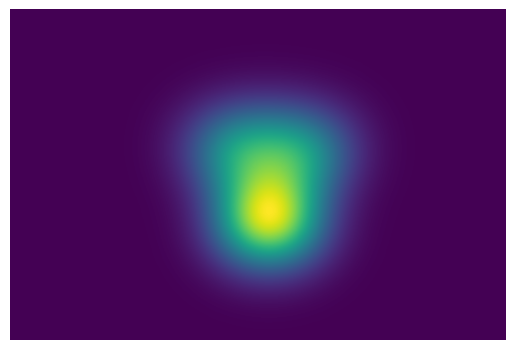

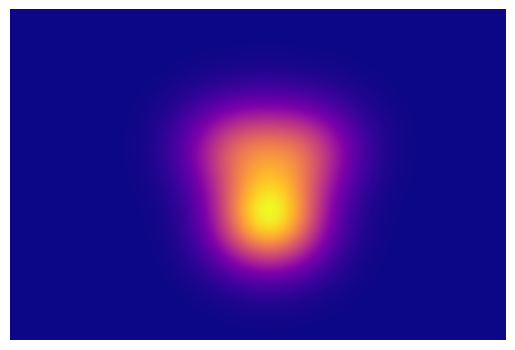

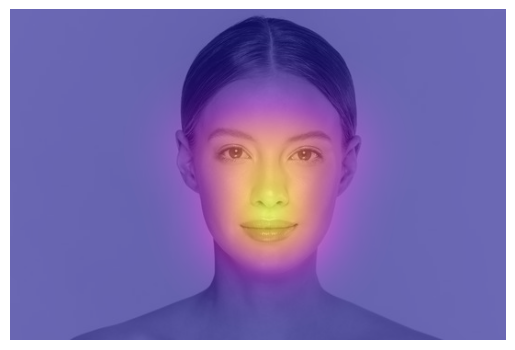

In [89]:
prior_face_masks, heatmaps, heatmaps_blended = mh.get_prior_face_masks(IMAGE_PATH, selected_pts)

print(len(prior_face_masks))
print(len(heatmaps))
print(len(heatmaps_blended))

idx = 0

Utils.display(prior_face_masks[idx])
Utils.display(heatmaps[idx])
Utils.display(heatmaps_blended[idx])

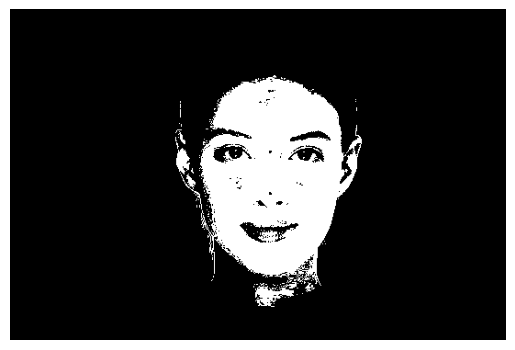

In [90]:
alpha = 0.69
lambda_ = 0.0018

skin_pixel_maps = mh.get_skin_pixel_maps(IMAGE_PATH, intensity_histograms, prior_face_masks, alpha, lambda_)

for i in skin_pixel_maps:
    Utils.display(i, cmap="gray")

In [91]:
spe = SuperpixelExtractor()
fe = FeatureExtractor()

slic, contoured_img, labels, num_superpixels = spe.get_slic_superpixels(IMAGE_PATH)

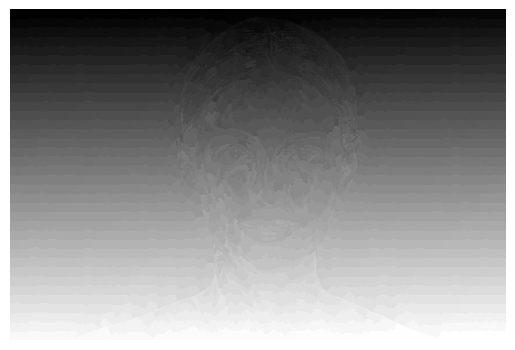

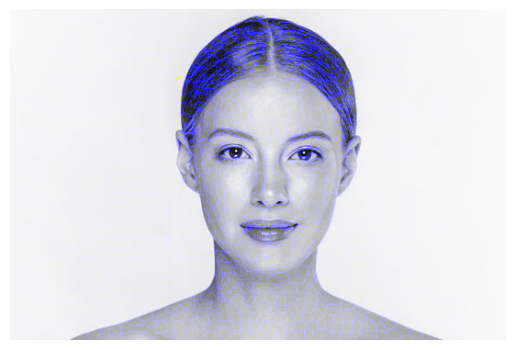

In [92]:
Utils.display(labels, cmap="gray")
Utils.display(contoured_img)

In [93]:
feature_vectors_sp = fe.extract_all_features_superpixels(IMAGE_PATH, slic)
print(feature_vectors_sp)

[{'label': 0, 'mean_intensity': 249.19834710743802, 'std_intensity': 0.39875497791123365, 'entropy': 0.3388823317671177, 'lacunarity_vector': array([1.        , 0.96694215, 0.23966942, 0.85123967, 1.        ,
       0.47107438, 1.        , 1.        , 1.        , 0.23966942,
       0.85123967, 1.        , 1.        , 0.47107438, 1.        ,
       1.        , 1.        , 0.38016529, 0.95041322, 0.97520661,
       1.        , 0.70247934, 0.96694215, 0.9338843 , 0.38016529,
       0.80165289, 0.96694215, 0.59504132, 0.96694215, 1.        ,
       1.        , 0.38016529, 0.80165289, 0.97520661, 0.88429752,
       0.59504132, 0.95041322, 1.        , 1.        , 0.47107438,
       0.95041322, 0.9338843 , 1.        , 0.8677686 ])}, {'label': 1, 'mean_intensity': 249.0, 'std_intensity': 0.0, 'entropy': 0.05354938088195042, 'lacunarity_vector': array([1.        , 1.        , 0.11009174, 1.        , 1.        ,
       0.34862385, 1.        , 1.        , 0.99082569, 0.11926606,
       1.        

In [94]:
feature_vector = fe.extract_all_features_mask(IMAGE_PATH, skin_pixel_maps[0])
print(feature_vector)

{'mean_intensity': 194.39249458195505, 'std_intensity': 19.914359128414716, 'entropy': 3.4498399063308924, 'lacunarity_vector': array([0.88525151, 0.54731759, 0.89855899, 0.8275731 , 0.52728033,
       0.93407095, 0.95433634, 0.71845177, 0.94224554, 0.93353865,
       0.9482149 , 0.69263526, 0.95182693, 0.97289076, 0.980419  ,
       0.8382571 , 0.98501958, 0.96916467, 0.97825178, 0.81559637,
       0.98616022, 0.98920193, 0.83935972, 0.55172807, 0.91969887,
       0.81669898, 0.51001863, 0.94334816, 0.94977377, 0.70913653,
       0.94638987, 0.96015361, 0.94882324, 0.67818714, 0.95669366,
       0.97627467, 0.97809969, 0.82753507, 0.98437322, 0.98323258,
       0.97387932, 0.82985438, 0.98391696, 0.98988632])}


In [95]:
individual_feature_probs, norm_params = fe.calculate_feature_learned_probability(feature_vectors_sp, feature_vector)

In [96]:
print(individual_feature_probs)

[{'label': 0, 'mean_intensity': 0.5045614337267006, 'std_intensity': 0.5128092544046263, 'entropy': 0.5797088611623804, 'lacunarity_vector': 0.6215425394286203}, {'label': 1, 'mean_intensity': 0.5045780009994645, 'std_intensity': 0.5125528420897529, 'entropy': 0.573109986323392, 'lacunarity_vector': 0.6066434524847896}, {'label': 2, 'mean_intensity': 0.5046426109562885, 'std_intensity': 0.512827869335542, 'entropy': 0.5810863812723018, 'lacunarity_vector': 0.6207274243472714}, {'label': 3, 'mean_intensity': 0.5047102536106093, 'std_intensity': 0.5128752965779494, 'entropy': 0.5869617717929959, 'lacunarity_vector': 0.6405705547268149}, {'label': 4, 'mean_intensity': 0.5047179572777687, 'std_intensity': 0.512866352216981, 'entropy': 0.5883810853068192, 'lacunarity_vector': 0.6540873293933068}, {'label': 5, 'mean_intensity': 0.5047457201791616, 'std_intensity': 0.5127157119662804, 'entropy': 0.5760881726323751, 'lacunarity_vector': 0.6064534698012994}, {'label': 6, 'mean_intensity': 0.504

In [97]:
combined_probability = fe.calculate_combined_probability(individual_feature_probs)
print(combined_probability)

[{'label': 0, 'p': 0.09322893064729881}, {'label': 1, 'p': 0.08991630431974067}, {'label': 2, 'p': 0.09334631277590905}, {'label': 3, 'p': 0.09732640849158938}, {'label': 4, 'p': 0.09962019858442947}, {'label': 5, 'p': 0.09041400678234589}, {'label': 6, 'p': 0.09736958686161186}, {'label': 7, 'p': 0.09281989610293236}, {'label': 8, 'p': 0.0923924768547183}, {'label': 9, 'p': 0.09600389476453056}, {'label': 10, 'p': 0.09421032599767959}, {'label': 11, 'p': 0.10014267380368361}, {'label': 12, 'p': 0.09295735875208129}, {'label': 13, 'p': 0.08876895024266043}, {'label': 14, 'p': 0.09637343880897278}, {'label': 15, 'p': 0.10023302241774125}, {'label': 16, 'p': 0.09557192894603085}, {'label': 17, 'p': 0.0940636206239322}, {'label': 18, 'p': 0.09604805527171129}, {'label': 19, 'p': 0.10288367671976077}, {'label': 20, 'p': 0.09865533641638602}, {'label': 21, 'p': 0.10063463915151241}, {'label': 22, 'p': 0.11016200665086134}, {'label': 23, 'p': 0.1211044536544135}, {'label': 24, 'p': 0.1413701

In [98]:
region_grower = RegionGrower()

In [99]:
seed_mask_for_labels = skin_pixel_maps[0].astype(bool)
unique_labels_in_mask = np.unique(labels[seed_mask_for_labels])
actual_seed_labels = set(int(lbl) for lbl in unique_labels_in_mask if lbl != -1)
print(len(actual_seed_labels))

341


In [100]:
initial_combined_probs_list = [{'label': item['label'], 'initial_combined_prob': item['p']} for item in combined_probability]

In [101]:
final_skin_labels = region_grower.grow(feature_vectors_sp, initial_combined_probs_list, labels, actual_seed_labels, norm_params)

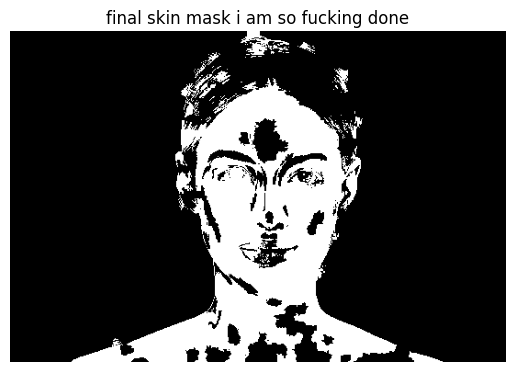

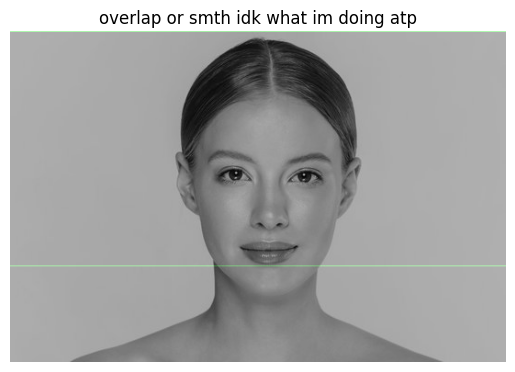

In [102]:
skin_region_mask = np.zeros_like(labels, dtype=np.uint8)
for label_val in final_skin_labels:
    skin_region_mask[labels == label_val] = 255
Utils.display(skin_region_mask, title='final skin mask i am so fucking done', cmap='gray')

img_gray_orig = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
img_rgb_orig = cv2.cvtColor(img_gray_orig, cv2.COLOR_GRAY2RGB)
overlay = np.zeros_like(img_rgb_orig)
overlay[skin_region_mask] = [0,255,0]
result_img = cv2.addWeighted(img_rgb_orig, 0.7, overlay, 0.3, 0)
Utils.display(result_img, title='overlap or smth idk what im doing atp')